## Objective

Handwritten digit images (0–9) ko K-Nearest Neighbors (KNN) algorithm ke through classify karna aur best K value find karna.

Dataset: Sklearn Digits Dataset (load_digits())

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


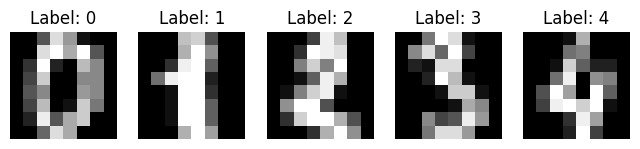

In [3]:
plt.figure(figsize=(8,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y , test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)

y_pred_best = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)

Accuracy with K=3: 0.9722222222222222


In [7]:
k_values = [3,5,7,9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [8]:
print(k_values)
print(accuracies)

[3, 5, 7, 9]
[0.9694444444444444, 0.975, 0.9722222222222222, 0.9722222222222222]


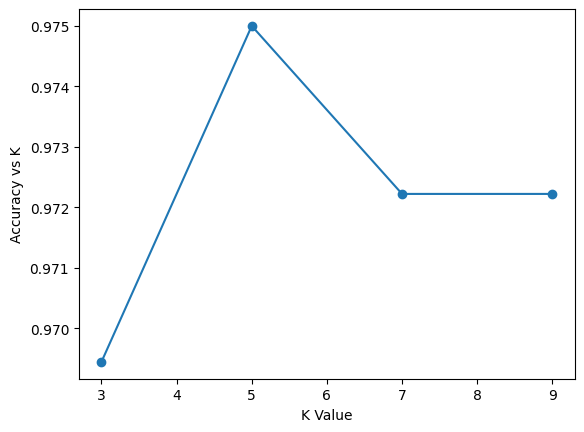

In [9]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy vs K")
plt.show()

### Best K Selection
From the Accuracy vs K graph, **K = 5** gives the highest accuracy.
Hence, K = 5 is selected as the optimal value.


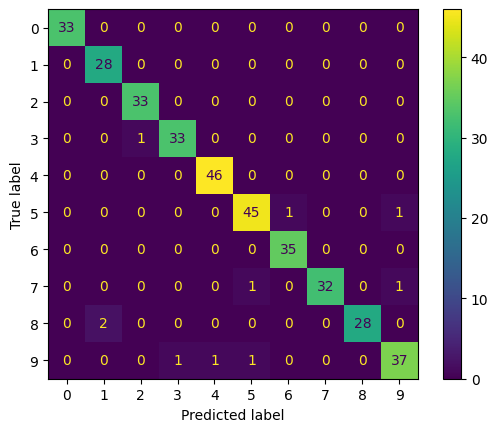

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

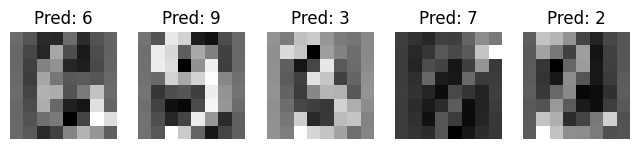

In [11]:
plt.figure(figsize=(8,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()

## Conclusion
- Successfully implemented KNN for handwritten digit classification
- Performed feature scaling for distance-based learning
- Tuned K value and selected optimal K
- Achieved ~97.5% accuracy
- Analyzed results using confusion matrix and visual predictions
